In [ ]:
# hide
# skip
! [ -e /content ] && pip install -Uqq model_inspector nbdev
# For colab. Restart the runtime after running this cell!

In [ ]:
# default_exp explore

In [ ]:
# export
from fastcore.test import test_fig_exists
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import pandas as pd
import scipy.cluster.hierarchy as hc

from model_inspector.delegate import delegates

In [ ]:
import sklearn.datasets

# explore

> Explore data.

In [ ]:
# hide
from nbdev.showdoc import *  # noqa: F401

In [ ]:
# export
@delegates(pd.DataFrame().style.background_gradient)
def show_correlation(df: pd.DataFrame, method="pearson", **kwargs):
    """Show correlation heatmap

    Parameters:
    - `df`: DataFrame
    - `method`: Method of correlation to pass to `df.corr()`
    """
    kwargs = {**{"cmap": "bwr", "vmin": -1, "vmax": 1}, **kwargs}
    return df.corr(method=method).style.background_gradient(**kwargs).format("{0:,.2f}")

In [ ]:
X_diabetes, y_diabetes = sklearn.datasets.load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
show_correlation(pd.concat((X_diabetes, y_diabetes), axis="columns"))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


In [ ]:
iris = sklearn.datasets.load_iris()
X_iris, y_iris = iris["data"], iris["target"]
y_iris = pd.Series(y_iris, name="iris type").map(
    {num: name for num, name in zip([0, 1, 2], iris["target_names"])}
)
X_iris = pd.DataFrame(X_iris, columns=iris["feature_names"])

In [ ]:
show_correlation(
    pd.concat((X_iris, pd.Series(y_iris == "setosa", name="setosa"))), method="spearman"
)

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
petal length (cm),1.00,0.94,0.88,-0.31
petal width (cm),0.94,1.00,0.83,-0.29
sepal length (cm),0.88,0.83,1.00,-0.17
sepal width (cm),-0.31,-0.29,-0.17,1.00


In [ ]:
# export
@delegates(hc.dendrogram)
def plot_column_clusters(
    df, corr_method: str = "spearman", ax: Axes = None, **kwargs
) -> Axes:
    """Plot a dendrogram based on column correlations

    Parameters:
    - `df`: DataFrame
    - `corr_method`: Method of correlation to pass to `df.corr()`
    - `ax`: Matplotlib `Axes` object. Plot will be added to this object
    if provided; otherwise a new `Axes` object will be generated.

    Adapted from
    https://github.com/fastai/book_nbs/blob/master/utils.py#L58-L64
    """
    corr_matrix = df.corr(method=corr_method)
    # For the purpose of evaluating redundancy of features in a
    # predictive model, variables that are perfectly correlated or
    # anti-correlated should count as maximally close.
    # As of 2021-08-03,
    # https://github.com/fastai/book_nbs/blob/master/utils.py#L58-L64
    # does not take an absolute value, which I think is a mistake; see
    # https://forums.fast.ai/t/should-cluster-columns-use-absolute-value/90413
    distance_matrix = 1 - abs(corr_matrix)
    corr_squareform = hc.distance.squareform(distance_matrix)
    z = hc.linkage(corr_squareform, method="average")

    if ax is None:
        _, ax = plt.subplots()
    if kwargs is None:
        kwargs = {}
    kwargs = {**kwargs, **{"orientation": "left", "leaf_font_size": 12}}

    hc.dendrogram(z, labels=df.columns, ax=ax, **kwargs)
    return ax

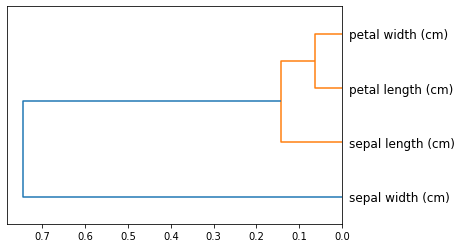

In [ ]:
ax = plot_column_clusters(X_iris)

In [ ]:
# hide
test_fig_exists(ax)